# Pyber
####  The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own

* Project base on two data base: 
data/city_data.csv
 & data/ride_data.csv


## Read the City and Ride Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#name the data base As : city_data_df & ride_data_df
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
city_data_df= pd.read_csv("data/city_data.csv")
ride_data_df= pd.read_csv("data/ride_data.csv")

print (city_data_df.shape + ride_data_df.shape )

(120, 3, 2375, 4)


merge two data frame with outer join. 

In [4]:
full_df= pd.merge(city_data_df,ride_data_df, on= 'city' , how="inner")

In [5]:
full_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
full_df.isnull().any()

city            False
driver_count    False
type            False
date            False
fare            False
ride_id         False
dtype: bool

In [7]:
row_1=full_df.iloc[0]
print(row_1)

city                    Richardfort
driver_count                     38
type                          Urban
date            2018-02-24 08:40:38
fare                          13.93
ride_id               5628545007794
Name: 0, dtype: object


## Bubble Plot of Ride Sharing Data 

# lets go 

<IPython.core.display.Javascript object>


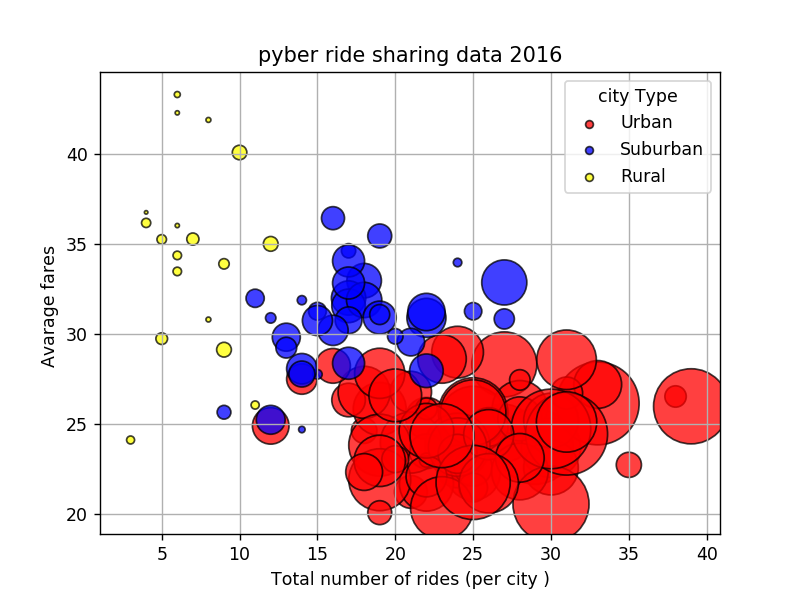

In [8]:
%matplotlib notebook
#put filter to chosse from data 
Typefilter1 = 'Urban'
Typefilter2 = 'Suburban'
Typefilter3= 'Rural'
#Typefilter='type of city'
mask1 = full_df['type'].str.contains(Typefilter1) 
mask2 = full_df['type'].str.contains(Typefilter2) 
mask3 = full_df['type'].str.contains(Typefilter3) 
# stage is just those indicators matching the USA for country code and life expectancy at birth for female over years.
stage1 = full_df[mask1]
stage2 = full_df[mask2]
stage3 = full_df[mask3]
s1=stage1.groupby("city")["driver_count"].sum()
s2=stage2.groupby("city")["driver_count"].sum()
s3=stage3.groupby("city")["driver_count"].sum()
stage1.head()
fig = plt.figure()
Urban=plt.scatter(stage1.groupby("city")["ride_id"].count(), stage1.groupby("city")["fare"].mean(), marker="o", facecolors="red", edgecolors="black",
           alpha=0.75, s=s1, label="Urban")

Suburban=plt.scatter(stage2.groupby("city")["ride_id"].count(), stage2.groupby("city")["fare"].mean(), marker="o", facecolors="blue", edgecolors="black",
alpha=0.75, s=s2, label="Suburban")

Rural=plt.scatter(stage3.groupby("city")["ride_id"].count(), stage3.groupby("city")["fare"].mean(), marker="o", facecolors="yellow", edgecolors="black",
           alpha=0.75, s=s3, label="Rural" )


In [14]:
plt.title("pyber ride sharing data 2016")
plt.xlabel("Total number of rides (per city )")
plt.ylabel("Avarage fares ")
legend= plt.legend(loc="best" , title="city Type")
legend.legendHandles[0]._sizes=[20]
legend.legendHandles[1]._sizes=[20]
legend.legendHandles[2]._sizes=[20]
plt.grid()
plt.show() 

save picture with name : 
pyber ride sharing data in same folder with notebook 


In [8]:

fig.savefig('Pyber ride sharing data 2016.png')


In [6]:
print("According to the pyber ride sharing data 2016 Analysis:")
print("----------------------------------------------")
print("1: Total number of rides per city in Uraban type is more than Rural and Suburban ")
print("2: Rural has the minimum number of rides and minumm number of drivers")
print("3: Avarage fares in Rural type of city is almost more than other types.")

According to the pyber ride sharing data 2016 Analysis:
----------------------------------------------
1: Total number of rides per city in Uraban type is more than Rural and Suburban 
2: Rural has the minimum number of rides and minumm number of drivers
3: Avarage fares in Rural type of city is almost more than other types.


## Total Fares by City Type

<IPython.core.display.Javascript object>


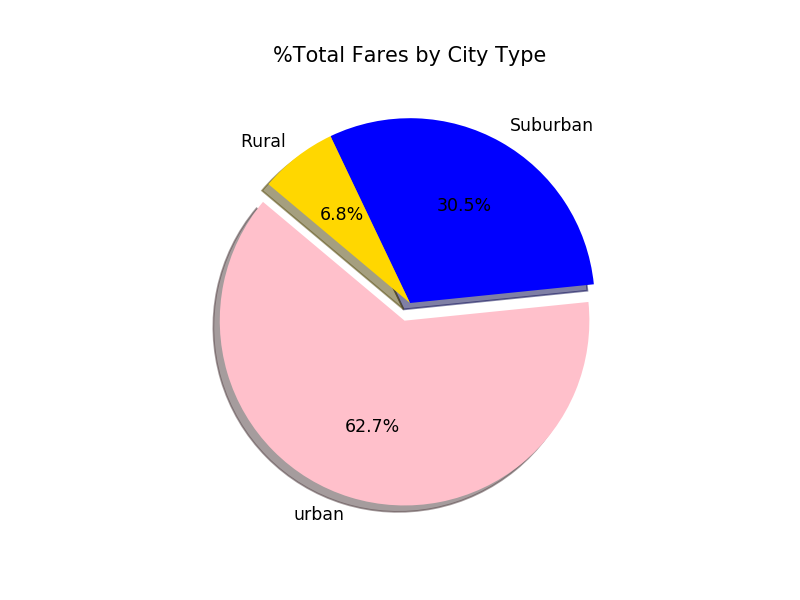

([<matplotlib.patches.Wedge at 0x963cdd8>,
 [Text(-0.352762,-1.14698,'urban'),
  Text(0.539264,0.958746,'Suburban'),
  Text(-0.673277,0.869884,'Rural')],
 [Text(-0.205778,-0.669071,'62.7%'),
  Text(0.294144,0.522952,'30.5%'),
  Text(-0.367242,0.474482,'6.8%')])

In [9]:
#get total of value of fare for each group of city 
urban=stage1["fare"].sum()
Suburban=stage2["fare"].sum()
Rural=stage3["fare"].sum()
#give labet to that
labels = ["urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban, Suburban, Rural]

# The colors of each section of the pie chart
colors = ["pink", "blue", "gold"]
# Tells matplotlib to seperate the "Python" section from the others 

explode = (0.1, 0, 0)
fig = plt.figure()
plt.axis("equal")
plt.title("%Total Fares by City Type")
#show plot 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


save figure 2 as : %Total Fares by City Type

In [10]:
fig.savefig('% Total Fares by City Type.png')

In [7]:
print(" According to the Total Fares by City Type Analysis :")
print("----------------------------------------------")
print("1: Its showes Urban cities have the highest total of fares,its because, Total number of rides per city in Uraban type is more than others.")


 According to the Total Fares by City Type Analysis :
----------------------------------------------
1: Its showes Urban cities have the highest total of fares,its because, Total number of rides per city in Uraban type is more than others.


## Total Rides by City Type

<IPython.core.display.Javascript object>


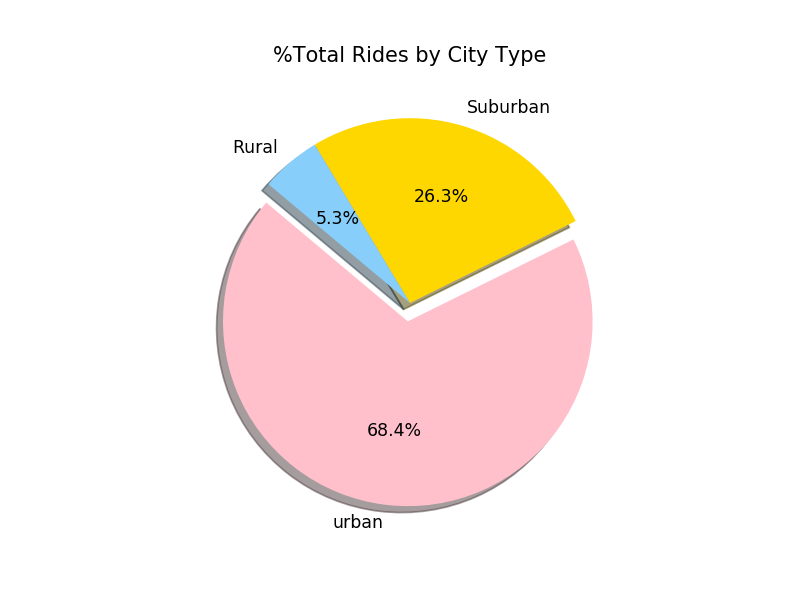

([<matplotlib.patches.Wedge at 0x9524208>,
 [Text(-0.14296,-1.19145,'urban'),
  Text(0.309024,1.0557,'Suburban'),
  Text(-0.714777,0.836118,'Rural')],
 [Text(-0.0833935,-0.695015,'68.4%'),
  Text(0.168559,0.575837,'26.3%'),
  Text(-0.389878,0.456065,'5.3%')])

In [11]:
#count rid ide to get total rid per each kind of city 
urban=stage1["ride_id"].count()
Suburban=stage2["ride_id"].count()
Rural=stage3["ride_id"].count()
labels = ["urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban, Suburban, Rural]

# The colors of each section of the pie chart
colors = ["pink","gold","lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
fig = plt.figure()
plt.axis("equal")
plt.title("%Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

save figure 2 as : %Total Rides by City Type

In [12]:
fig.savefig('% Total Rides by City Type.png')

In [8]:
print("  According to the Total Rides by City Type Analysis :")
print("----------------------------------------------")
print("1: Urban city Type with 68.4%  has the most trips.")

  According to the Total Rides by City Type Analysis :
----------------------------------------------
1: Urban city Type with 68.4%  has the most trips.


### Total driver by city type 

<IPython.core.display.Javascript object>


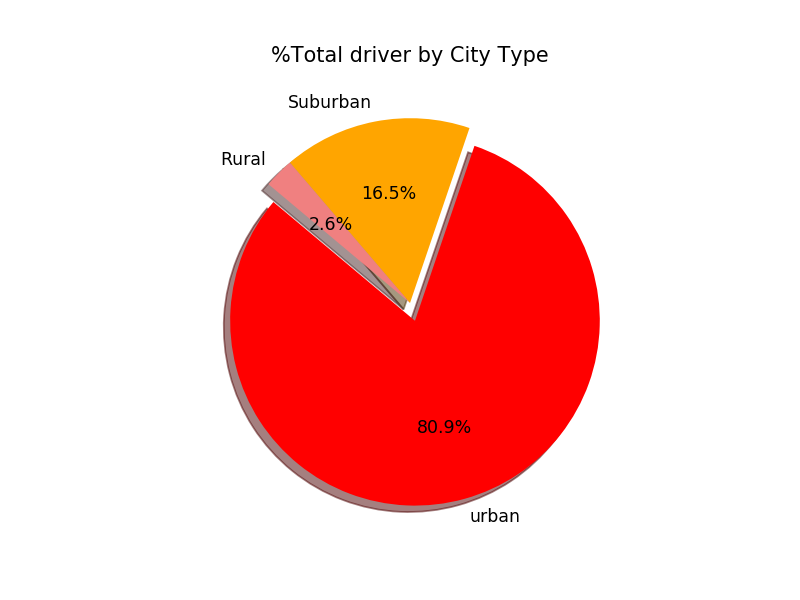

([<matplotlib.patches.Wedge at 0x957cbe0>,
 [Text(0.322916,-1.15574,'urban'),
  Text(-0.207779,1.0802,'Suburban'),
  Text(-0.781576,0.774041,'Rural')],
 [Text(0.188368,-0.674179,'80.9%'),
  Text(-0.113334,0.589199,'16.5%'),
  Text(-0.426314,0.422204,'2.6%')])

In [13]:
#get sum of the total  unique number of driver by city type 
urban=stage1.groupby(["city", "type"])["driver_count"].unique().sum()
Suburban=stage2.groupby(["city", "type"])["driver_count"].unique().sum()
Rural=stage3.groupby(["city", "type"])["driver_count"].unique().sum()

labels = ["urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban, Suburban, Rural]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
fig = plt.figure()
plt.axis("equal")
plt.title("%Total driver by City Type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

save image as %Total driver by city type 

In [14]:
fig.savefig(' %Total driver by city type .png')

In [12]:
print(" According to the Total driver by City Type Analysis :")
print("----------------------------------------------")
print("1: Urban city Type with 80.9%  has the most Drivers.")

 According to the Total driver by City Type Analysis :
----------------------------------------------
1: Urban city Type with 80.9%  has the most Drivers.


## plotting again with just city dataframe 

In [5]:

city_data_df.head()
driverdata= city_data_df.groupby("type").sum()
driverdata.head()

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


([<matplotlib.patches.Wedge at 0x942db38>,
 [Text(-0.0905629,1.09627,'urban'),
  Text(-0.693922,0.853506,'Suburban'),
  Text(0.70602,-1.03152,'Rural')],
 [Text(-0.049398,0.597963,'2.6%'),
  Text(-0.378503,0.465549,'16.5%'),
  Text(0.423612,-0.618913,'80.9%')])

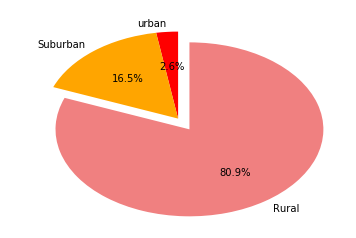

In [10]:
colors = ["red", "orange", "lightcoral"]
fig = plt.figure()
plt.pie(
    # using data total)arrests
    driverdata['driver_count'],
    # with the labels being officer names
    labels = ["urban", "Suburban", "Rural"],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

In [11]:
fig.savefig(' %Total driver by city type2 .png')

In [11]:
print(" in short: Urban city Type has the most Drivers and most number of rides. ")


 in short: Urban city Type has the most Drivers and most number of rides. 
